In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data=pd.read_csv("C:/Users/Anil PC/OneDrive/Desktop/INTERNSHIP/New folder/MOCK_DATA.csv")
data.head(10)

,date,time,latitude,longitude,city,weather_condition,road_condition,severity,contributing_factor,traffic_condition,vehicle_type,age,gender
0,9/18/2014,5:16 AM,40.746386,-8.700896,Torreira,sunny,dry,high,speeding,heavy,SUV,61,Male
1,3/17/2014,9:03 PM,35.852357,66.522390,Sang-e Chārak,rainy,icy,low,distracted driving,light,motorcycle,52,Male
2,4/23/2003,9:58 PM,16.902200,121.761910,Minante Segundo,rainy,icy,low,distracted driving,light,SUV,73,Female
3,10/19/2001,12:11 AM,32.165000,108.882222,Daba,cloudy,wet,high,weather conditions,heavy,sedan,21,Male
4,3/22/2006,7:08 PM,16.252414,120.483511,Inabaan Sur,rainy,wet,high,speeding,light,SUV,94,Male
5,11/17/2011,1:08 PM,29.476705,121.869339,Xiangshan,rainy,dry,medium,weather conditions,light,sedan,18,Male
6,7/5/2007,6:16 PM,18.055958,106.299291,Kỳ Anh,rainy,dry,high,weather conditions,heavy,SUV,92,Male
7,7/10/2004,12:10 PM,35.967677,126.736629,Kunsan,cloudy,icy,low,speeding,light,sedan,70,Female
8,11/19/2020,10:47 PM,57.925898,59.970317,Krasnogvardeyets,snowy,dry,high,weather conditions,heavy,truck,93,Female
9,9/2/2012,3:34 AM,52.244593,104.248308,Irkutsk,cloudy,wet,high,weather conditions,heavy,motorcycle,81,Male


In [17]:
data.isnull()

,date,time,latitude,longitude,city,weather_condition,road_condition,severity,contributing_factor,traffic_condition,vehicle_type,age,gender
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
data = data.dropna()

In [19]:
print(data.describe())

          latitude    longitude          age
count  1000.000000  1000.000000  1000.000000
mean     23.371077    40.059570    59.178000
std      25.061383    72.015772    24.214224
min     -37.153444  -157.393647    18.000000
25%       4.305535    -7.303007    38.000000
50%      30.385146    35.262479    60.000000
75%      43.808656   111.679279    80.000000
max      78.221061   177.450489   100.000000


In [20]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 1000 non-null   object 
 1   time                 1000 non-null   object 
 2   latitude             1000 non-null   float64
 3   longitude            1000 non-null   float64
 4   city                 1000 non-null   object 
 5   weather_condition    1000 non-null   object 
 6   road_condition       1000 non-null   object 
 7   severity             1000 non-null   object 
 8   contributing_factor  1000 non-null   object 
 9   traffic_condition    1000 non-null   object 
 10  vehicle_type         1000 non-null   object 
 11  age                  1000 non-null   int64  
 12  gender               1000 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 101.7+ KB
None


In [21]:
road_conditions = data['road_condition'].value_counts()
print(road_conditions)


road_condition
icy      257
wet      253
snowy    249
dry      241
Name: count, dtype: int64


In [22]:
weather_conditions = data['weather_condition'].value_counts()
print(weather_conditions)


weather_condition
rainy     272
sunny     254
snowy     246
cloudy    228
Name: count, dtype: int64


In [23]:
data['time_of_day'] = pd.to_datetime(data['time']).dt.hour
time_of_day = data['time_of_day'].value_counts()
print(time_of_day)


time_of_day
2     56
21    53
1     50
18    48
17    48
4     48
5     46
14    46
10    46
6     44
16    42
8     41
11    39
9     39
3     39
22    39
19    39
20    38
15    38
0     37
23    33
7     31
12    30
13    30
Name: count, dtype: int64


C:\Users\Anil PC\AppData\Local\Temp\ipykernel_17472\3747032591.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time_of_day'] = pd.to_datetime(data['time']).dt.hour


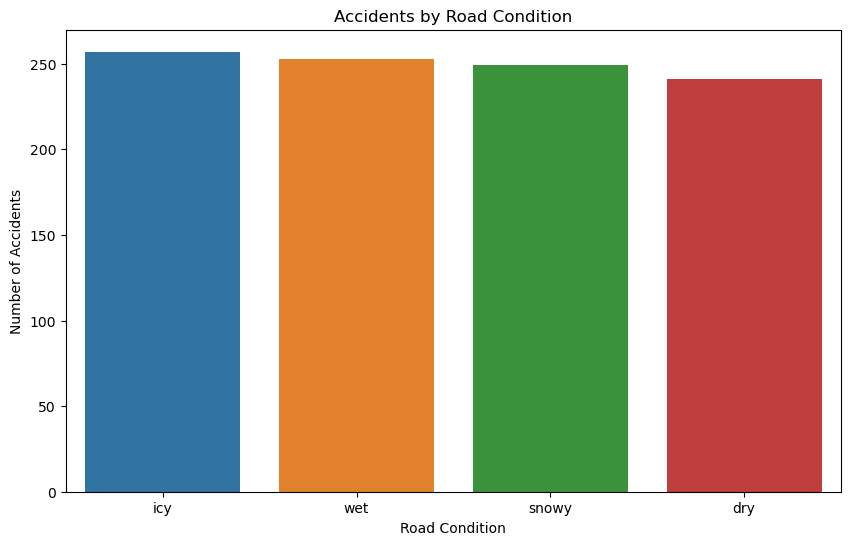

In [24]:
# Road Conditions
plt.figure(figsize=(10,6))
sns.barplot(x=road_conditions.index, y=road_conditions.values)
plt.title('Accidents by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.show()


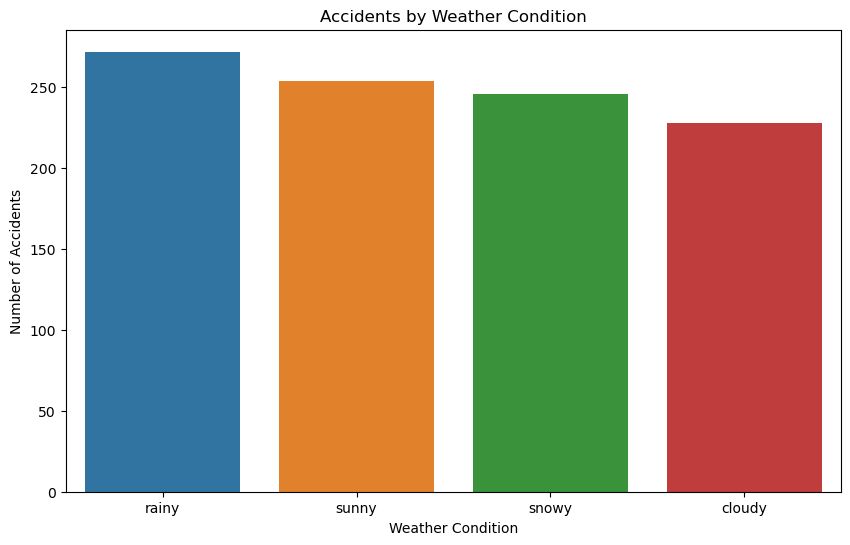

In [25]:
# Weather Conditions
plt.figure(figsize=(10,6))
sns.barplot(x=weather_conditions.index, y=weather_conditions.values)
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


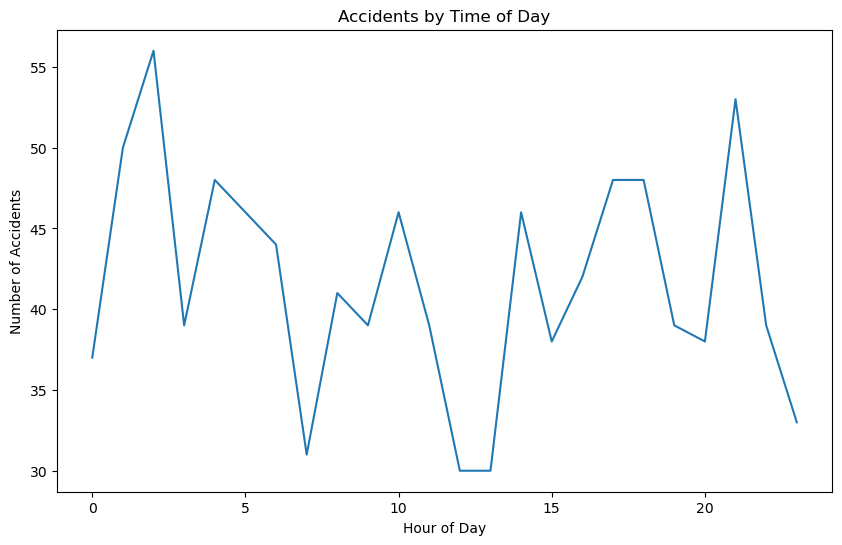

In [26]:
# Time of Day
plt.figure(figsize=(10,6))
sns.lineplot(x=time_of_day.index, y=time_of_day.values)
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


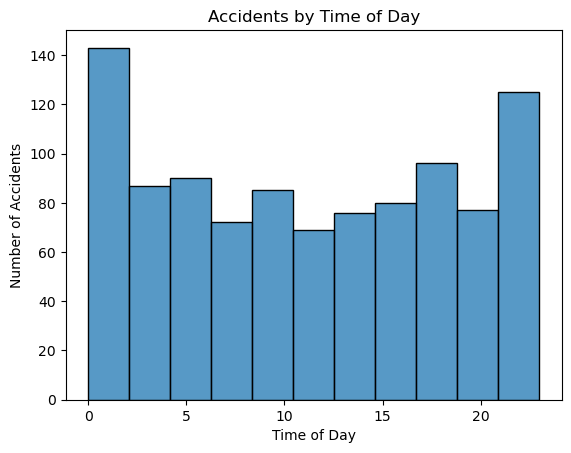

In [27]:
#Plotting accidents by time of day
sns.histplot(data['time_of_day'])
plt.title('Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()


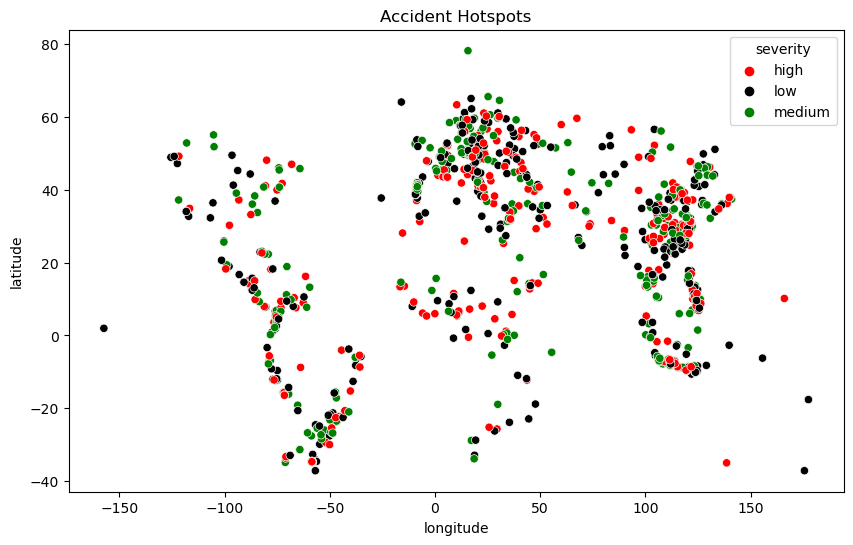

In [40]:
# Heatmap for geographical accident hotspots
custom_palette = ['red', 'black', 'green']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='severity', palette= custom_palette)
plt.title('Accident Hotspots')
plt.show()

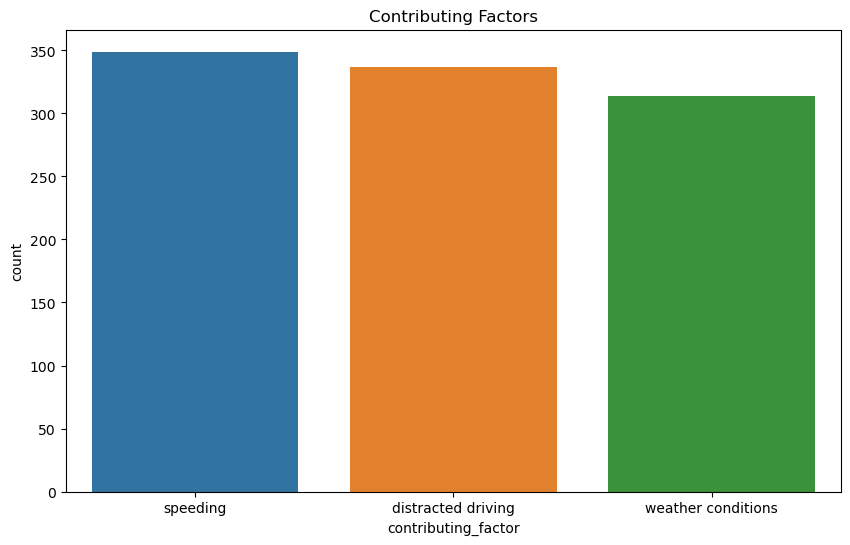

In [41]:
# Bar chart for contributing factors
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='contributing_factor')
plt.title('Contributing Factors')
plt.show()

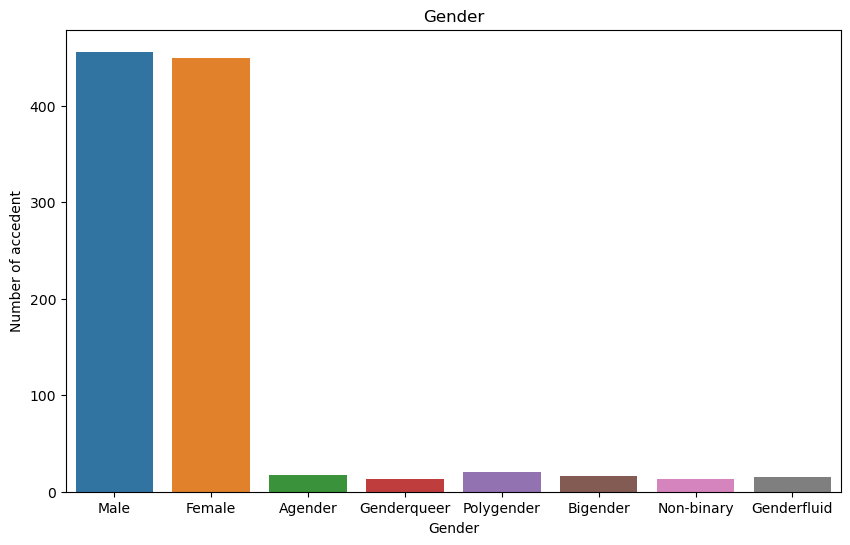

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='gender')
plt.title('Gender')
plt.xlabel('Gender')     
plt.ylabel('Number of accedent') 
plt.show()